In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [4]:
df.shape

(54808, 13)

In [5]:
X = df.drop(['is_promoted'], axis = 1)
y = df['is_promoted']

In [6]:
X.values
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test1, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [8]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

### XgBoost

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_pred = model.predict(x_test1)


In [12]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test1, y_test))

Training Accuracy : 0.949391050494914
Testing Accuracy : 0.9393358876117497


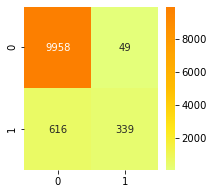

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [14]:
prediction = model.predict(np.array([[6, #department code
                                      2, #masters degree
                                      1, #male
                                      10, #1 training
                                      35, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      8, #KPIs met >80%
                                      10, #awards won
                                      90, #avg training score
                                      30, #sum of metric 
                                      100 #total score
                                     ]]))

ValueError: feature_names mismatch: ['department', 'education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'sum_metric', 'total_score'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
expected sum_metric, awards_won?, length_of_service, age, KPIs_met >80%, no_of_trainings, education, gender, department, avg_training_score, previous_year_rating, total_score in input data
training data did not have the following fields: f2, f5, f0, f3, f6, f8, f7, f11, f10, f9, f1, f4

In [ ]:
prediction1 = model.predict(np.array([[7, #department code
                                      2, #masters degree
                                      0, #male
                                      1, #1 training
                                      35, #35 years old
                                      5, #previous year rating
                                      3, #length of service
                                      1, #KPIs met >80%
                                      50, #awards won
                                      1, #avg training score
                                      6, #sum of metric 
                                      50 #total score
                                     ]]))

In [ ]:
if prediction1 == 1:
    print("employee promoted")
else:
    print("woops! employee not promoted")

## Hyper PArameter Optimisation

In [ ]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train, y_train)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time)

In [ ]:
random_search.best_score_

In [ ]:
random_search.best_estimator_

In [ ]:
prediction = random_search.predict(np.array([[6, #department code
                                      2, #masters degree
                                      1, #male
                                      10, #1 training
                                      35, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      8, #KPIs met >80%
                                      10, #awards won
                                      90, #avg training score
                                      30, #sum of metric 
                                      100 #total score
                                     ]]))